# Attention Visualization

In [1]:
!pip install --upgrade tensorflow-gpu==1.13.0rc1

Requirement already up-to-date: tensorflow-gpu==1.13.0rc1 in /usr/local/lib/python3.6/dist-packages (1.13.0rc1)


In [2]:
import tensorflow as tf

tf.__version__

'1.13.0-rc1'

In [3]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls -al

total 40
drwxr-xr-x 1 root root 4096 Jul  5 20:53 .
drwxr-xr-x 1 root root 4096 Jul  5 20:51 ..
-rw-r--r-- 1 root root 2529 Jul  5 20:53 adc.json
drwxr-xr-x 1 root root 4096 Jul  5 20:53 .config
drwxr-xr-x 2 root root 4096 Jul  5 20:53 data_in
drwxr-xr-x 3 root root 4096 Jul  5 20:55 data_out
drwx------ 3 root root 4096 Jul  5 20:53 gdrive
drwxr-xr-x 1 root root 4096 Jun 18 16:14 sample_data


In [0]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'

In [6]:
!rm -rf data_in;rm -rf data_out;ls;

adc.json  gdrive  sample_data


In [0]:
import os

if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

In [8]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/Data/'

total 9495
-rw------- 1 root root  889842 Jun 29 03:10 ChatBotData.csv
-rw------- 1 root root  830764 Jul  3 06:37 data_configs.json
-rw------- 1 root root 1600128 Jul  3 06:37 nsmc_test_input.npy
-rw------- 1 root root  400128 Jul  3 06:37 nsmc_test_label.npy
-rw------- 1 root root 4800128 Jul  3 06:37 nsmc_train_input.npy
-rw------- 1 root root 1200128 Jul  3 06:37 nsmc_train_label.npy


In [9]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/Seq2seq/'

total 20
-rw------- 1 root root 10819 Jun 29 03:42 data.py
-rw------- 1 root root  4657 Jun 29 03:42 model.py
drwx------ 2 root root  4096 Jul  5 20:54 __pycache__


In [10]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/Data/'

total 9495
-rw------- 1 root root  889842 Jun 29 03:10 ChatBotData.csv
-rw------- 1 root root  830764 Jul  3 06:37 data_configs.json
-rw------- 1 root root 1600128 Jul  3 06:37 nsmc_test_input.npy
-rw------- 1 root root  400128 Jul  3 06:37 nsmc_test_label.npy
-rw------- 1 root root 4800128 Jul  3 06:37 nsmc_train_input.npy
-rw------- 1 root root 1200128 Jul  3 06:37 nsmc_train_label.npy


In [11]:
!wget -P '/content/gdrive/My Drive/Colab Notebooks/Seq2seq/' https://raw.githubusercontent.com/changwookjun/learningspoons/master/Seq2seq/model_att.py

--2019-07-05 22:09:41--  https://raw.githubusercontent.com/changwookjun/learningspoons/master/Seq2seq/model_att.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6820 (6.7K) [text/plain]
Saving to: ‘/content/gdrive/My Drive/Colab Notebooks/Seq2seq/model_att.py’

model_att.py        100%[===================>]   6.66K  --.-KB/s    in 0.001s  

2019-07-05 22:09:42 (5.58 MB/s) - ‘/content/gdrive/My Drive/Colab Notebooks/Seq2seq/model_att.py’ saved [6820/6820]



In [12]:
!wget -P '/content/gdrive/My Drive/Colab Notebooks/Seq2seq/' https://raw.githubusercontent.com/changwookjun/learningspoons/master/Seq2seq/configs.py

--2019-07-05 22:09:44--  https://raw.githubusercontent.com/changwookjun/learningspoons/master/Seq2seq/configs.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1450 (1.4K) [text/plain]
Saving to: ‘/content/gdrive/My Drive/Colab Notebooks/Seq2seq/configs.py’

configs.py          100%[===================>]   1.42K  --.-KB/s    in 0s      

2019-07-05 22:09:44 (98.8 MB/s) - ‘/content/gdrive/My Drive/Colab Notebooks/Seq2seq/configs.py’ saved [1450/1450]



In [13]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/Seq2seq/'

total 29
-rw------- 1 root root  1450 Jul  5 22:09 configs.py
-rw------- 1 root root 10819 Jun 29 03:42 data.py
-rw------- 1 root root  6820 Jul  5 22:09 model_att.py
-rw------- 1 root root  4657 Jun 29 03:42 model.py
drwx------ 2 root root  4096 Jul  5 20:54 __pycache__


In [14]:
!ls -al ./data_in/

total 12
drwxr-xr-x 2 root root 4096 Jul  5 22:09 .
drwxr-xr-x 1 root root 4096 Jul  5 22:09 ..


In [15]:
!cp '/content/gdrive/My Drive/Colab Notebooks/Data/ChatBotData.csv' ./data_in/ChatBotData.csv;ls -al ./data_in/

total 884
drwxr-xr-x 2 root root   4096 Jul  5 22:09 .
drwxr-xr-x 1 root root   4096 Jul  5 22:09 ..
-rw------- 1 root root 889842 Jul  5 22:09 ChatBotData.csv


In [16]:
!ls -al ./data_in/

total 884
drwxr-xr-x 2 root root   4096 Jul  5 22:09 .
drwxr-xr-x 1 root root   4096 Jul  5 22:09 ..
-rw------- 1 root root 889842 Jul  5 22:09 ChatBotData.csv


In [17]:
import pandas as pd

train_data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv')
train_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


### Install Pakage

In [18]:
!pip install konlpy

In [19]:
!pip install tqdm

### Import Package

In [0]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from konlpy.tag import Okt
import re
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### Mount Gdrive Source

In [0]:
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/Seq2seq/')

import data
import configs as conf
import model_att as ml

In [22]:
char2idx,  idx2char, vocabulary_length = data.load_vocabulary()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)
100%|██████████| 11823/11823 [00:11<00:00, 1072.30it/s]


In [23]:
print(vocabulary_length)

12657


In [0]:
train_input, train_label, eval_input, eval_label = data.load_data()

In [25]:
train_input_enc, train_input_enc_length = data.enc_processing(train_input, char2idx)
train_output_dec, train_output_dec_length = data.dec_input_processing(train_label, char2idx)
train_target_dec = data.dec_target_processing(train_label, char2idx)

100%|██████████| 7921/7921 [00:07<00:00, 1079.93it/s]


In [26]:
eval_input_enc, eval_input_enc_length = data.enc_processing(eval_input,char2idx)
eval_output_dec, eval_output_dec_length = data.dec_input_processing(eval_label, char2idx)
eval_target_dec = data.dec_target_processing(eval_label, char2idx)

100%|██████████| 3902/3902 [00:03<00:00, 1080.58it/s]


In [0]:
check_point_path = os.path.join(os.getcwd(), conf.DEFINES.check_point_path)
os.makedirs(check_point_path, exist_ok=True)

In [28]:
seq2seq = tf.estimator.Estimator(
        model_fn=ml.model, # 모델 등록한다.
        model_dir=conf.DEFINES.check_point_path, # 체크포인트 위치 등록한다.
        params={ # 모델 쪽으로 파라메터 전달한다.
            'hidden_size': conf.DEFINES.hidden_size, # 가중치 크기 설정한다.
            'layer_size': conf.DEFINES.layer_size, # 멀티 레이어 층 개수를 설정한다.
            'learning_rate': conf.DEFINES.learning_rate, # 학습율 설정한다. 
            'vocabulary_length': vocabulary_length, # 딕셔너리 크기를 설정한다.
            'embedding_size': conf.DEFINES.embedding_size, # 임베딩 크기를 설정한다.
            'teacher_forcing_rate': 0.7
        })

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './data_out/check_point', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5c2d052da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
!rm -rf ./data_out/check_point

### 04:58분 시작

In [30]:
seq2seq.train(input_fn=lambda:data.train_input_fn(
    train_input_enc, train_output_dec, train_target_dec,  conf.DEFINES.batch_size), steps=conf.DEFINES.train_steps)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
INFO:tensorflow:Calling model_fn.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `rate` i

In [31]:
eval_result = seq2seq.evaluate(input_fn=lambda:data.eval_input_fn(
    eval_input_enc, eval_output_dec, eval_target_dec,  conf.DEFINES.batch_size))
print('\nEVAL set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-07-05T23:06:53Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./data_out/check_point/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-07-05-23:07:01
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.7209841, global_step = 20000, loss = 3.166473
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: ./data_out/check_point/model.ckpt-20000

EVAL set accuracy: 0.721



In [32]:
# 테스트용 데이터 만드는 부분이다.
# 인코딩 부분 만든다.
predic_input_enc, predic_input_enc_length = data.enc_processing(["남자친구 승진 선물로 뭐가 좋을까?"], char2idx)
# 학습 과정이 아니므로 디코딩 입력은 
# 존재하지 않는다.(구조를 맞추기 위해 넣는다.)
predic_output_dec, predic_output_decLength = data.dec_input_processing([""], char2idx)       
# 학습 과정이 아니므로 디코딩 출력 부분도 
# 존재하지 않는다.(구조를 맞추기 위해 넣는다.)
predic_target_dec = data.dec_target_processing([""], char2idx)      

# 예측을 하는 부분이다.
predictions = seq2seq.predict(
    input_fn=lambda:data.eval_input_fn(predic_input_enc, predic_output_dec, predic_target_dec, conf.DEFINES.batch_size))

# 예측한 값을 인지 할 수 있도록 
# 텍스트로 변경하는 부분이다.
answer = data.pred2string(predictions, idx2char)
print(answer)

100%|██████████| 1/1 [00:00<00:00, 478.80it/s]

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./data_out/check_point/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
['직접', '물어보는', '게', '좋을', '것', '같아요', '<END>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>']
직접 물어보는 게 좋을 것 같아요 
직접 물어보는 게 좋을 것 같아요 


In [0]:
variable_names = seq2seq.get_variable_names()

In [0]:
emb = seq2seq.get_variable_value(variable_names[2])

In [0]:
#emb

In [0]:
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    plt.show()

In [0]:
def translate(attention, sentence, result):
    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [0]:
!apt-get update -qq #나눔고딕 인스톨
!apt-get install fonts-nanum* -qq

In [39]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name() 
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
fm._rebuild()

In [0]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

Input: 남자친구 승진 선물로 뭐가 좋을까?
Predicted translation: 직접 물어보는 게 좋을 것 같아요 


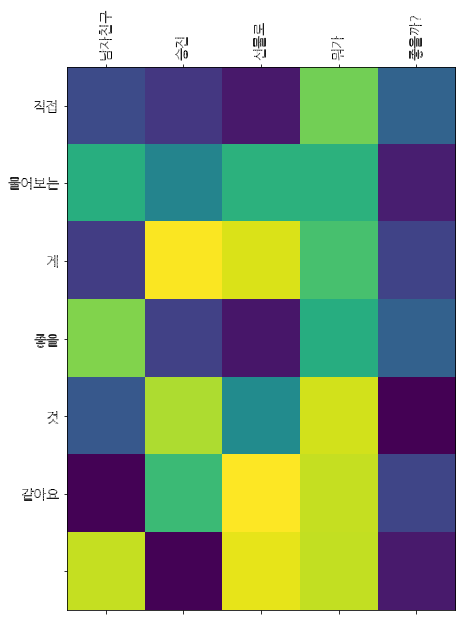

In [42]:
import matplotlib.pyplot as plt

translate(emb, "남자친구 승진 선물로 뭐가 좋을까?", answer)